In [1]:
from IPython.display import HTML
import torch

In [2]:
import pandas as pd

In [3]:
import torch.utils.data as data_utils

In [4]:
import matplotlib.pyplot as plt


# Création de tenseur 

Pytorch (et tensorflow) utilisent des "tenseurs" pour stocker des données. C'est l'équivalent des ndarray de numpy et fonctionnent de manière similaire avec quelques fonctionalités en plus. Une des choses très intéressantes avec Pytorch est sa forte compatibilité avec numpy. 

Avec la méthode torch.tensor créer un vecteur contenant les valeurs [-1, 2, 3, 5] et le stocker dans la variable t

Afficher son type

In [4]:
t = torch.tensor([-1, 2, 3, 5])
t.type()

'torch.LongTensor'

Calculer 2 * t, qu'est ce que ça fait ? 

In [5]:
2*t

tensor([-2,  4,  6, 10])

Créer un tensor avec les valeurs [-1, 2.2, 3.3] et le stocker dans la variable t2. Afficher son type

In [6]:
t2 = torch.tensor([-1, 2.2, 3.3])
t2.type()

'torch.FloatTensor'

Chercher la méthode permettant de convertir un tenseur float en tenseur de type Long et convertir t2 en type Long

In [7]:
t3 = t.float()
t3.type()

'torch.FloatTensor'

In [8]:
t4 = t2.long()
t4.type()

'torch.LongTensor'

Créer une matrice aléatoire de taille 3, 3 avec la fonction numpy.random.randn et créer un tenseur pytorch à partir du tableau numpy et le stocker dans la variabne **A**




In [9]:
A = torch.rand(3,3)
A

tensor([[0.7757, 0.5414, 0.4888],
        [0.9445, 0.9740, 0.5185],
        [0.9337, 0.8630, 0.2235]])

# Manipulation et fonctions sur les tenseurs

Comme numpy, pytorch possède toutes les fonctions mathématiques standard. 

a l'aide de la méthode torch.cos, calculer le cosinus du tenseur A précédent

In [10]:
torch.cos(A)

tensor([[0.7140, 0.8570, 0.8829],
        [0.5862, 0.5620, 0.8685],
        [0.5949, 0.6502, 0.9751]])

Calculer exp de la même manière

In [11]:
torch.exp(A)

tensor([[2.1720, 1.7184, 1.6304],
        [2.5714, 2.6486, 1.6796],
        [2.5439, 2.3703, 1.2504]])

Calculer la somme des valeurs du tensor A et la moyenne

In [12]:
torch.sum(A)

tensor(6.2631)

In [13]:
torch.mean(A)

tensor(0.6959)

# Différentiation automatique

Pytorch permet de faire des choses très pratiques : calculer les dérivée partielles d'expression utilisant des tenseurs. 

Avec la fonction torch.tensor, créer un tenseur à une dimension contenant la valeur -1;0 et la stocker dans la variable **t**

Il faudra spécifier la valeur requires_grad = True en créant le tenseur

Calculer $ exp(-t^2) $ et stocker le resultat dans la variable **z**

appeler la méthode .backward sur le tenseur z

vous pourrez ainsi récupérer le gradient de z par rapport à t dans la variable t. Le stocker dans la variable grad_t et l'afficher



In [10]:
t = torch.tensor([-1.], requires_grad = True)
h = -t**2
z = torch.exp(h)
z.backward()
t.grad

tensor([0.7358])

-   Gradient of function $y = f(x) \,  \mbox{or}  \, y = exp(h), h = -t^2, t = (t_1, t_2, t_3) $ respect to t is a Jacobien matrix J, so, for a vector v = (v_1, v_2, v_3), we can compute $ v^T.J $
- Ref : https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

In [16]:
t2 = torch.tensor([-1., 0., 1.], requires_grad = True)
h = -t2**2
z = torch.exp(h)
#z.backward()
# t2.grad 
# --> error
v = torch.tensor([0., 1., -1.])
z.backward(v)
print(t2.grad)

tensor([0.0000, -0.0000, 0.7358])


## Regression linéaire avec Pytorch

Dans cet exercice on va faire une mini regression linéaire

Créer un tensor **theta** contenant $\theta_0 = -1$ et $\theta_1 = 0.5 $ en activant les gradient. 

Créer un tensor X avec les valeurs 1, 2, 3, 4 sans gradient

Créer un tensor y avec les valeurs 2, 4, 6, 8 sans gradient



In [19]:
theta = torch.tensor([-1., 0.5], requires_grad = True)
X = torch.tensor([1.,2.,3.,4.])
y = torch.tensor([2., 4., 6., 8.])

Calculer $ \hat{y}  = \theta_0 + \theta_1 * x$  et le stocker dans la variable **y_pred**

In [20]:
y_pred = theta[0] + theta[1]*X

In [21]:
y_pred

tensor([-0.5000,  0.0000,  0.5000,  1.0000], grad_fn=<AddBackward0>)

Calculer la MSE entre les prédictions et les labels et le stocker dans la variable **mse**

In [22]:
mse = torch.mean((y_pred - y)**2)
mse

tensor(25.3750, grad_fn=<MeanBackward0>)

utiliser la méthode  backward sur **mse** et afficher le gradient par rapport à $\theta$

In [23]:
mse.backward()
theta.grad

tensor([ -9.5000, -27.5000])

# Le premier vrai modèle

Jusqu'à présent on a manipulé les tenseurs à la main. Mais pour créer des modèles en Pytorch il faut créer des classes qui hérite de nn.Module. 

Compléter la classe LinearRegression suivante qui permet d'implémenter une régression linéaire qui utilise une seule variable X pour prédire Y. 


In [88]:
import torch.nn as nn
class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(1,1)# input_dim and output_dim
            
    def forward(self, x):
        return self.lin(x)


# Entraînement d'un modèle. 

Contrairement à Keras, Pytorch ne fournit pas de methode .fit sur les modèles. Il faut faire sa procédure d'entraînement soi même, ce qui a l'avantage de proposer plus de souplesses. Pour pouvoir effectuer l'entraînement il faut plusieurs ingrédients: 

- un optimiser 
- une fonction de loss
- les données
- le modèle

Créer une instance de votre modèle. 

In [89]:
model = LinearRegression()

Le code suivant permet de charger un csv comme dataset. L'adapter pour qu'il marche avec votre dataset.

In [90]:
df = pd.read_csv('data/data_reg.csv')
x = torch.tensor(df["x"].values).float().view(7,1)# need to reshape tensor
y = torch.tensor(df[" y"].values).float().view(7,1)# need to reshape tensor
train = data_utils.TensorDataset(x,y)
train_loader = data_utils.DataLoader(train, batch_size=7, shuffle=False)

Créer une instance de MSELoss 

In [41]:
#loss_fn = nn.MSELoss(reduction='mean')
#loss = loss_fn(train, y)

Créer une instance de l'optimiser SGD 

In [91]:
model = LinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [92]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.005
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Compléter le code suivant qui permet de faire l'entraînement du modèle

In [93]:
n_epoch = 10
losses = []
for epoch in range(n_epoch):
    print("iteration", epoch)
    for x, y in train_loader:
        #print("x", x)
        #print("y",y)
        optimizer.zero_grad()
        predictions = model(x)
        print("prediction", predictions)
        loss = torch.mean((predictions - y)**2)
        print("loss", loss.item())
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad()
    

iteration 0
prediction tensor([[ 0.0094],
        [ 0.2390],
        [ 0.4687],
        [-0.2202],
        [ 0.0094],
        [-1.3684],
        [-1.4143]], grad_fn=<AddmmBackward>)
loss 2.735759973526001
iteration 1
prediction tensor([[ 0.0376],
        [ 0.2745],
        [ 0.5114],
        [-0.1992],
        [ 0.0376],
        [-1.3836],
        [-1.4310]], grad_fn=<AddmmBackward>)
loss 2.656813859939575
iteration 2
prediction tensor([[ 0.0653],
        [ 0.3092],
        [ 0.5532],
        [-0.1786],
        [ 0.0653],
        [-1.3983],
        [-1.4471]], grad_fn=<AddmmBackward>)
loss 2.581012010574341
iteration 3
prediction tensor([[ 0.0924],
        [ 0.3432],
        [ 0.5940],
        [-0.1584],
        [ 0.0924],
        [-1.4123],
        [-1.4625]], grad_fn=<AddmmBackward>)
loss 2.5082154273986816
iteration 4
prediction tensor([[ 0.1190],
        [ 0.3765],
        [ 0.6339],
        [-0.1385],
        [ 0.1190],
        [-1.4258],
        [-1.4773]], grad_fn=<AddmmBackward

Afficher la loss au cours de l'entraînement et vérifier qu'elle diminue bien. 

In [94]:
losses

[2.735759973526001,
 2.656813859939575,
 2.581012010574341,
 2.5082154273986816,
 2.4382898807525635,
 2.371108293533325,
 2.306549549102783,
 2.2444987297058105,
 2.184845447540283,
 2.1274845600128174]

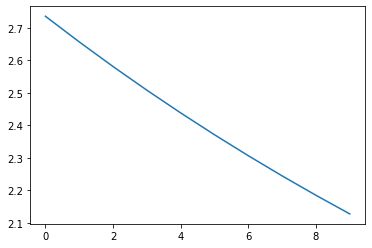

In [95]:
import matplotlib.pyplot as plt
plt.plot(losses)

Afficher les paramètres de votre régression linéaire


In [96]:
model.parameters

<bound method Module.parameters of LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)>

In [97]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

lin.weight tensor([[0.5879]])
lin.bias tensor([-0.3201])
